# Tarefa:

Utilize o conjunto de dados [**Iris**](https://archive.ics.uci.edu/dataset/53/iris) importado pelo código abaixo:

```python
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

# metadata
print(iris.metadata)

# variable information
print(iris.variables)
```

1. **Criação do DataFrame**  
   - Una `X` e `y` em um único DataFrame chamado `df_iris`, incluindo as colunas de características e a coluna da espécie (por exemplo, nome da coluna `species`).

2. **Exploração dos Dados**  
   - Exiba as **5 primeiras linhas** de `df_iris`.  
   - Utilize `info()` para verificar os tipos das colunas.  
   - Mostre estatísticas descritivas com `describe()`.

3. **Seleção e Filtragem**  
   - Selecione apenas as colunas `sepal length` e `sepal width`.  
   - Filtre todas as linhas em que `sepal length` seja maior que `6.0`.

4. **Transformação**  
   - Crie uma nova coluna chamada `sepal_area` que seja o produto de `sepal length * sepal width`.  
   - Ordene `df_iris` por `sepal_area` em ordem decrescente.

5. **Agrupamento**  
   - Calcule a **média** de todas as colunas numéricas **agrupadas por espécie** (`species`).

6. **Visualização**  
   - Crie um **histograma** da coluna `petal length`.  
   - Plote um **gráfico de barras** mostrando a **média de `petal width` por espécie**.

In [2]:
!pip install ucimlrepo

In [18]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# adquire o dataset
iris = fetch_ucirepo(id=53)

# dados (em dataframes da pandas)
x = iris.data.features
y = iris.data.targets
# metadados
print(iris.metadata)

# informações das variáveis
print(iris.variables)

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

In [28]:
#1 criação do dataframe
# união de x(atributos de entrada) e y(atributo de saída) em um dataframe chamado df_iris (renomeação de título "classe" para "species")
df_iris = x
df_iris['species'] = y


In [30]:
#2 Exploração dos dados
df_iris.head(5)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
#2 Exploração dos dados
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [32]:
#2 Exploração dos dados
df_iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [38]:
#3 Seleção e Filtragem
df_iris[['sepal length', 'sepal width']]


,sepal length,sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [39]:
#3 Seleção e Filtragem
df_iris[df_iris['sepal length'] > 6.0]
#nota-se que a espécie Iris-Setosa (de índice 0 a 49) foi removida nessa filtragem.

,sepal length,sepal width,petal length,petal width,species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica


In [40]:
#4 Transformação
df_iris['sepal_area'] = df_iris['sepal length'] * df_iris['sepal width']
df_iris['sepal_area']

,sepal_area
0,17.85
1,14.70
2,15.04
3,14.26
4,18.00
...,...
145,20.10
146,15.75
147,19.50
148,21.08


In [41]:
#4.2
df_iris.sort_values('sepal_area')

,sepal length,sepal width,petal length,petal width,species,sepal_area
60,5.0,2.0,3.5,1.0,Iris-versicolor,10.00
41,4.5,2.3,1.3,0.3,Iris-setosa,10.35
93,5.0,2.3,3.3,1.0,Iris-versicolor,11.50
57,4.9,2.4,3.3,1.0,Iris-versicolor,11.76
106,4.9,2.5,4.5,1.7,Iris-virginica,12.25
...,...,...,...,...,...,...
14,5.8,4.0,1.2,0.2,Iris-setosa,23.20
15,5.7,4.4,1.5,0.4,Iris-setosa,25.08
109,7.2,3.6,6.1,2.5,Iris-virginica,25.92
117,7.7,3.8,6.7,2.2,Iris-virginica,29.26


In [43]:
#5 Agrupamento
df_iris.groupby('species')[['sepal length', 'sepal width', 'petal length', 'petal width']].mean()

,sepal length,sepal width,petal length,petal width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


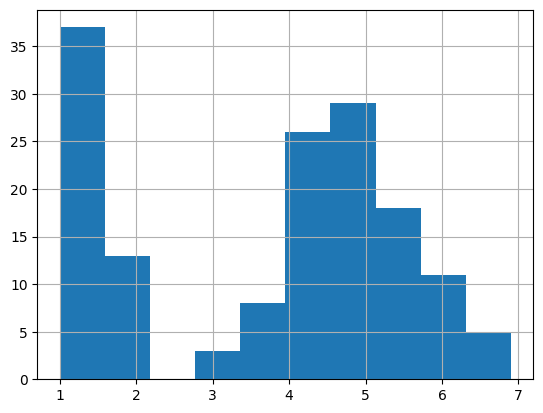

In [44]:
#6 Visualização
df_iris['petal length'].hist()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

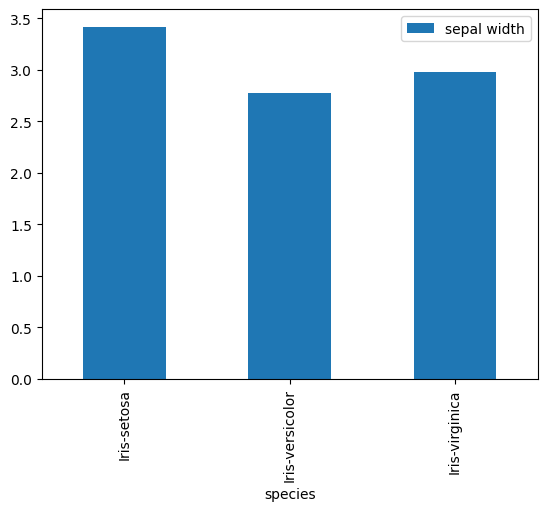

In [48]:
#6
mean_species_petal_width = df_iris.groupby('species')[['sepal width']].mean()
mean_species_petal_width.plot(kind='bar')
plt.show